In [1]:
pwd

'/kaggle/working'

In [2]:
!cp -r /kaggle/input/yolov8/mydataset /kaggle/working/
!cp -r /kaggle/input/yolov8/mydata.yaml /kaggle/working/mydata.yaml

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [4]:
import os
import random
import shutil
from math import floor

# 定义数据集的路径
dataset_path = '/kaggle/working/mydataset'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# 创建训练、验证和测试集的目录结构
train_images_path = os.path.join(images_path, 'train')
val_images_path = os.path.join(images_path, 'val')
test_images_path = os.path.join(images_path, 'test')

train_labels_path = os.path.join(labels_path, 'train')
val_labels_path = os.path.join(labels_path, 'val')
test_labels_path = os.path.join(labels_path, 'test')

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)
os.makedirs(test_labels_path, exist_ok=True)

# 获取所有图片文件名
image_files = [f for f in os.listdir(images_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 打乱文件顺序
random.shuffle(image_files)

# 计算每个子集的大小
total_images = len(image_files)
train_size = floor(total_images * 0.7)
val_size = floor(total_images * 0.1)
test_size = total_images - train_size - val_size

# 划分数据集
train_files = image_files[:train_size]
val_files = image_files[train_size:train_size + val_size]
test_files = image_files[train_size + val_size:]

def copy_files(file_list, source_dir, dest_dir):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        image_source = os.path.join(source_dir, file_name)
        label_source = os.path.join(labels_path, f"{base_name}.txt")

        image_dest = os.path.join(dest_dir, file_name)
        label_dest = os.path.join(dest_dir.replace('images', 'labels'), f"{base_name}.txt")

        shutil.copy2(image_source, image_dest)
        shutil.copy2(label_source, label_dest)

# 复制训练集文件
copy_files(train_files, images_path, train_images_path)

# 复制验证集文件
copy_files(val_files, images_path, val_images_path)

# 复制测试集文件
copy_files(test_files, images_path, test_images_path)

print("数据集划分完成：")
print(f"训练集: {len(train_files)} 个文件")
print(f"验证集: {len(val_files)} 个文件")
print(f"测试集: {len(test_files)} 个文件")


数据集划分完成：
训练集: 40 个文件
验证集: 5 个文件
测试集: 13 个文件


In [5]:
from ultralytics import YOLO

# 加载预训练模型
model = YOLO('yolov8m.pt')

# 配置数据集路径和参数
data_config = '/kaggle/working/mydata.yaml'
epochs = 1000
batch_size = 32

# 开始训练
model.train(data=data_config, epochs=epochs, batch=batch_size, imgsz=640)

100%|██████████| 49.7M/49.7M [00:00<00:00, 232MB/s]


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/mydata.yaml, epochs=1000, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]
2024-06-07 05:22:24,639	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-07 05:22:25,830	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 67.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/mydataset/labels/train... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 954.37it/s]

train: New cache created: /kaggle/working/mydataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/mydataset/labels/val... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 727.29it/s]

val: New cache created: /kaggle/working/mydataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      13.8G      4.661      4.988      2.989        384        640: 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all          5         85          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      13.5G      4.586      5.034      3.202        220        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.07it/s]

                   all          5         85          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      12.9G      4.602      5.021       3.03        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.26it/s]

                   all          5         85          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      13.4G      4.569      4.932      3.202        233        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.80it/s]

                   all          5         85          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000        13G      4.713      5.018      2.976        335        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.90it/s]

                   all          5         85          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      13.1G      3.986      4.469      2.641        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.46it/s]

                   all          5         85    0.00183     0.0304    0.00174   0.000251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      13.2G      3.326      3.852      2.146        201        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.67it/s]

                   all          5         85     0.0128      0.198     0.0156    0.00397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      13.8G      2.629      3.209      1.655        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.66it/s]

                   all          5         85      0.514     0.0986     0.0831     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      13.7G       2.38      2.828      1.426        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.19it/s]

                   all          5         85      0.471      0.219       0.19     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      13.7G      2.341      2.534       1.34        328        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.67it/s]

                   all          5         85      0.316      0.386      0.206     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      13.1G      2.104      2.324      1.249        279        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]

                   all          5         85      0.491       0.43       0.25      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      13.8G       1.92      2.145      1.195        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.49it/s]

                   all          5         85      0.441      0.548      0.339      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      13.7G      1.905      2.109      1.201        219        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.03it/s]

                   all          5         85      0.492      0.474      0.394      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      13.6G      1.931      1.938      1.188        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.27it/s]

                   all          5         85      0.428      0.592      0.403       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      13.7G      1.827      1.788      1.239        209        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]

                   all          5         85      0.485      0.623      0.463      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      13.7G      1.963      1.906      1.177        260        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]

                   all          5         85      0.413      0.713      0.488      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      13.7G      1.908      1.775      1.207        237        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.88it/s]

                   all          5         85      0.443      0.586       0.54      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      13.7G      1.843      1.866      1.185        232        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.85it/s]

                   all          5         85       0.37      0.755      0.649      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      13.2G      1.894      1.776      1.155        271        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]

                   all          5         85      0.436      0.737      0.656      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      13.7G      1.845       1.61      1.135        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all          5         85      0.461       0.65      0.686      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      13.1G      1.806      1.585      1.093        302        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]

                   all          5         85      0.556      0.695      0.716      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      13.2G      1.745      1.459      1.168        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all          5         85      0.512      0.805      0.718      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      13.3G      1.764      1.467      1.205        239        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.24it/s]

                   all          5         85       0.58      0.652      0.709      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      13.7G      1.786      1.428      1.162        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.88it/s]

                   all          5         85      0.532      0.729      0.729      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      13.7G      1.872      1.353      1.217        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.53it/s]

                   all          5         85      0.502      0.748      0.769      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      13.7G      1.851      1.428      1.147        285        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.93it/s]

                   all          5         85      0.563      0.793      0.783      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      13.7G      1.796      1.388      1.172        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.51it/s]

                   all          5         85      0.595      0.778      0.793      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      13.7G      1.787      1.326      1.161        338        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.86it/s]

                   all          5         85      0.583      0.785      0.793      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      13.4G      1.805      1.351      1.161        302        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.25it/s]

                   all          5         85      0.492      0.892      0.785      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      13.2G      1.767      1.359      1.125        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.06it/s]

                   all          5         85      0.517        0.9      0.783       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      13.7G      1.719      1.353      1.137        311        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.66it/s]

                   all          5         85      0.669      0.825      0.803      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      13.7G      1.616      1.215      1.088        302        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.53it/s]

                   all          5         85      0.582      0.838      0.826      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      13.7G      1.694      1.265      1.104        253        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.47it/s]

                   all          5         85      0.701      0.821      0.814      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      13.7G      1.705      1.238      1.159        226        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.07it/s]

                   all          5         85       0.71      0.751      0.833      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      13.7G      1.683      1.103      1.161        237        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.85it/s]

                   all          5         85      0.719      0.728      0.826      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      13.7G      1.634      1.148      1.091        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.13it/s]

                   all          5         85      0.727      0.764      0.864      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      13.1G      1.745      1.234      1.069        407        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

                   all          5         85      0.802      0.787      0.883       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      13.7G      1.699       1.15      1.215        232        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.61it/s]

                   all          5         85       0.84      0.795      0.897      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      13.1G      1.614      1.057      1.095        223        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.40it/s]

                   all          5         85      0.712      0.839      0.887      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      13.8G      1.734      1.123      1.146        274        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          5         85      0.625      0.892      0.892      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      14.1G      1.706      1.125      1.074        348        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.24it/s]

                   all          5         85       0.67      0.761      0.871      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      13.7G      1.665      1.087      1.059        331        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.05it/s]

                   all          5         85      0.741      0.745      0.883      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      13.7G      1.592      1.094      1.078        221        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.21it/s]

                   all          5         85      0.717      0.871       0.88      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      13.7G      1.634      1.084      1.091        307        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.97it/s]

                   all          5         85      0.828      0.888      0.917      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      13.7G      1.577      1.061       1.09        295        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.80it/s]

                   all          5         85       0.83      0.885      0.924       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      13.6G      1.694      1.064       1.11        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.20it/s]

                   all          5         85      0.732      0.894      0.916      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      13.7G      1.589      1.037      1.123        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.80it/s]

                   all          5         85      0.803      0.822      0.921      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      13.7G      1.669      1.031      1.115        307        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.47it/s]

                   all          5         85      0.767      0.854       0.91      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      13.2G      1.587      1.062      1.102        250        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.58it/s]

                   all          5         85      0.748      0.926      0.895      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      13.4G      1.617     0.9662      1.129        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.47it/s]

                   all          5         85      0.796       0.71      0.864      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      13.7G      1.523      1.021      1.051        286        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.50it/s]

                   all          5         85      0.823      0.892      0.927      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      13.3G      1.542     0.9312      1.095        239        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.98it/s]

                   all          5         85      0.744      0.885       0.92      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      13.8G      1.596     0.9669      1.097        229        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.70it/s]

                   all          5         85      0.737      0.884      0.916      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      13.7G      1.579      1.054      1.072        183        640: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.90it/s]

                   all          5         85      0.768      0.815      0.932      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      13.7G      1.521     0.9475      1.035        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]

                   all          5         85      0.794      0.621      0.847      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      13.7G      1.564     0.9981      1.089        245        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.12it/s]

                   all          5         85      0.672      0.599       0.69       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      13.9G      1.476     0.9355      1.039        328        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.93it/s]

                   all          5         85      0.708      0.701      0.813      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      13.2G       1.67      1.022      1.044        326        640: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.14it/s]

                   all          5         85       0.65      0.928      0.916      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      13.6G      1.459     0.8463      1.057        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.02it/s]

                   all          5         85      0.666      0.882      0.884      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      13.7G      1.455     0.8975      1.049        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.23it/s]

                   all          5         85      0.748      0.792      0.833      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      13.2G      1.518     0.8499      1.075        262        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.38it/s]

                   all          5         85      0.832      0.823      0.912      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      13.7G      1.421     0.8279      1.055        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.57it/s]

                   all          5         85      0.655      0.877      0.897      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      13.2G      1.432     0.8642      1.069        218        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.94it/s]

                   all          5         85      0.691      0.855      0.906      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      12.7G      1.428     0.8249      1.007        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.70it/s]

                   all          5         85      0.834      0.887      0.942      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      13.6G      1.436     0.8266      1.032        311        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.23it/s]

                   all          5         85      0.848      0.903      0.943      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      13.7G      1.411      0.778      1.051        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.80it/s]

                   all          5         85      0.857      0.816      0.917      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      13.8G      1.503     0.8729      1.077        255        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         85      0.837      0.854      0.924      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      13.7G      1.409     0.8327      1.071        258        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.52it/s]

                   all          5         85      0.875      0.888      0.932      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      13.4G      1.492     0.8396      1.045        306        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.40it/s]

                   all          5         85      0.888      0.905      0.937       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      13.7G      1.475     0.8531      1.039        278        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.07it/s]

                   all          5         85      0.865      0.912      0.943      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      13.2G      1.419     0.8418      1.015        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.98it/s]

                   all          5         85      0.855      0.903       0.94      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      13.7G      1.413     0.8091      1.052        260        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all          5         85      0.881      0.881      0.954      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      13.1G      1.334       0.85      1.009        189        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.29it/s]

                   all          5         85      0.854      0.845      0.944      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      13.7G      1.339      0.777     0.9967        270        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.21it/s]

                   all          5         85      0.804      0.866      0.937      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      13.7G      1.404      0.848      1.006        313        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.37it/s]

                   all          5         85      0.885      0.823      0.937      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      13.7G      1.487     0.8318      1.053        223        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all          5         85      0.851      0.878      0.934      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      13.6G      1.449     0.7933      1.016        301        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all          5         85      0.901      0.868      0.946      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      13.6G      1.402     0.8159      1.017        339        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.82it/s]

                   all          5         85      0.828      0.924       0.94      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      13.7G      1.468     0.8327      1.034        231        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.62it/s]

                   all          5         85      0.862      0.807      0.932      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000        14G      1.401     0.7398      1.089        235        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.40it/s]

                   all          5         85      0.779      0.848      0.913      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      13.2G      1.453     0.8484      1.076        221        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.10it/s]

                   all          5         85      0.851      0.825      0.935      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      13.7G      1.324     0.7561      1.013        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.57it/s]

                   all          5         85      0.842      0.881      0.942      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      13.2G       1.31     0.7353      1.008        274        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.17it/s]

                   all          5         85      0.893      0.883      0.938      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      13.7G      1.365     0.7789     0.9914        306        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.07it/s]

                   all          5         85      0.854        0.9      0.936      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      13.7G        1.3     0.7336     0.9969        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.08it/s]

                   all          5         85      0.873      0.884       0.95      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      13.2G       1.35     0.8101     0.9865        299        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.96it/s]

                   all          5         85      0.797      0.881      0.928      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      14.1G      1.273     0.7311     0.9882        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.41it/s]

                   all          5         85      0.791      0.874      0.909      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      13.7G      1.334     0.7715     0.9746        309        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.18it/s]

                   all          5         85      0.877      0.895      0.921      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      13.2G      1.279     0.7079     0.9814        275        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.04it/s]

                   all          5         85      0.886      0.897      0.929      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      13.7G      1.335     0.7242      1.007        270        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.27it/s]

                   all          5         85      0.837      0.899      0.928       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      13.6G      1.284     0.7206     0.9833        334        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.33it/s]

                   all          5         85      0.903       0.84      0.919      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      13.7G      1.294     0.6853     0.9858        297        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.67it/s]

                   all          5         85      0.874      0.811      0.919      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      13.6G      1.267     0.7102      1.016        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.94it/s]

                   all          5         85      0.901      0.818      0.939       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      13.7G      1.387     0.7665     0.9504        332        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

                   all          5         85      0.911      0.848      0.929      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      13.7G      1.369     0.7506     0.9804        320        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.52it/s]

                   all          5         85      0.913      0.868       0.92      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      13.7G      1.324     0.7655     0.9925        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.70it/s]

                   all          5         85      0.877      0.915      0.918      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      13.2G      1.357     0.7323     0.9678        337        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]

                   all          5         85       0.87      0.907      0.926      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      13.7G      1.291     0.7334     0.9643        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.90it/s]

                   all          5         85      0.859      0.905      0.922      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      13.1G      1.306     0.7397     0.9933        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.64it/s]

                   all          5         85      0.882      0.864      0.918      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      13.3G      1.316     0.7514     0.9492        318        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.26it/s]

                   all          5         85      0.878      0.853       0.92      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      13.3G      1.237      0.684     0.9756        258        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.03it/s]

                   all          5         85      0.898      0.817      0.908      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      13.2G      1.359     0.7009      1.011        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.12it/s]

                   all          5         85      0.896      0.831      0.909       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      13.4G      1.249     0.7178     0.9629        353        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.90it/s]

                   all          5         85      0.863      0.894      0.928      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      13.7G      1.231     0.6641     0.9305        304        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.12it/s]

                   all          5         85      0.875      0.901      0.949      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      13.6G      1.229     0.6572     0.9886        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.80it/s]

                   all          5         85       0.87      0.908       0.96       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      13.7G      1.219      0.681     0.9626        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.46it/s]

                   all          5         85      0.843      0.898      0.946      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      13.7G      1.221     0.6535     0.9731        297        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.15it/s]

                   all          5         85      0.843       0.91      0.929      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      13.7G      1.187     0.6534      1.005        199        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.92it/s]

                   all          5         85       0.81      0.881      0.929      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      13.7G      1.254     0.6691     0.9556        227        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.39it/s]

                   all          5         85      0.812      0.886      0.929      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      13.2G      1.301     0.6959      0.984        305        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.64it/s]

                   all          5         85      0.826      0.884      0.931      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      13.7G      1.306     0.7004     0.9861        281        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.63it/s]

                   all          5         85      0.855      0.896       0.93      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      13.7G      1.255     0.6871     0.9633        316        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]

                   all          5         85      0.887      0.881      0.931      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      13.7G      1.251     0.6454     0.9661        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.98it/s]

                   all          5         85      0.889      0.886      0.927      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      13.7G      1.198     0.6354     0.9371        314        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]

                   all          5         85      0.849      0.898       0.94      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      13.2G      1.226     0.6297     0.9719        253        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]

                   all          5         85      0.868      0.864      0.934      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      13.7G      1.308     0.6663     0.9557        257        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.78it/s]

                   all          5         85      0.857      0.862      0.934      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      13.6G       1.21     0.6564     0.9716        235        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all          5         85      0.879      0.861      0.927      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      13.7G      1.229     0.6281     0.9714        271        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.08it/s]

                   all          5         85       0.87      0.848      0.928      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      13.6G      1.224     0.6579     0.9316        310        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.06it/s]

                   all          5         85      0.858      0.867      0.923      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      13.2G      1.127     0.6141     0.9367        244        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.03it/s]

                   all          5         85       0.88      0.856      0.917      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      13.7G      1.166     0.6198     0.9459        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]

                   all          5         85      0.892      0.842      0.911      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      13.7G      1.103     0.5759      0.943        275        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all          5         85      0.876      0.851      0.911      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      13.7G      1.143     0.6261     0.9339        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.95it/s]

                   all          5         85      0.891      0.836      0.909      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      13.6G      1.162     0.6252     0.9341        202        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.06it/s]

                   all          5         85      0.866      0.882      0.911      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      13.7G      1.229     0.6564     0.9266        359        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.15it/s]

                   all          5         85      0.887      0.886      0.919      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      13.7G      1.217     0.7086     0.9475        298        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.37it/s]

                   all          5         85       0.89      0.887      0.941      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      13.6G       1.07     0.6108     0.9188        264        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]

                   all          5         85      0.896      0.894      0.933      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      13.2G      1.236     0.6695     0.9769        234        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.46it/s]

                   all          5         85      0.899      0.892      0.928       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      13.9G      1.051     0.5651     0.9072        301        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.97it/s]

                   all          5         85      0.868      0.901      0.929      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      13.7G      1.148     0.5999     0.9627        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.65it/s]

                   all          5         85      0.906       0.87      0.921      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      13.1G      1.139     0.6562     0.9406        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.22it/s]

                   all          5         85      0.883      0.902      0.923      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      13.1G      1.061     0.5557     0.9253        221        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.36it/s]

                   all          5         85      0.899      0.879      0.922      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      13.7G      1.148      0.605     0.9183        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]

                   all          5         85      0.829      0.898      0.921      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      13.2G      1.095     0.6129     0.9152        293        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.32it/s]

                   all          5         85       0.86      0.885      0.938      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      13.7G      1.092     0.5746     0.9455        308        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.97it/s]

                   all          5         85      0.842      0.902      0.938      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      13.7G      1.041     0.5532     0.9346        264        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          5         85      0.861      0.924      0.936      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      13.2G      1.052      0.569     0.9283        246        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]

                   all          5         85      0.889      0.893      0.947      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      13.2G      1.026      0.579     0.9029        279        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.30it/s]

                   all          5         85      0.904      0.876      0.935      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      13.1G      1.045     0.5575     0.9137        265        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.61it/s]

                   all          5         85      0.865        0.9       0.93       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      13.4G      1.064      0.601     0.9376        240        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.72it/s]

                   all          5         85      0.888      0.903      0.919      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      13.7G      1.156     0.6107     0.9347        309        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

                   all          5         85      0.889      0.889      0.915      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      13.7G      1.122     0.5933     0.9421        223        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.63it/s]

                   all          5         85      0.885      0.867      0.907      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      13.2G      1.053     0.5658     0.9173        256        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.27it/s]

                   all          5         85      0.899      0.882      0.915      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      13.7G       1.05     0.5669     0.9236        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.32it/s]

                   all          5         85      0.903      0.878      0.917      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      13.7G       1.07     0.5657     0.9038        314        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.20it/s]

                   all          5         85      0.897      0.896       0.92      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      13.6G      1.052     0.5803     0.9069        340        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.07it/s]

                   all          5         85      0.895      0.905      0.926       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      13.3G      1.055     0.5328       0.94        222        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.67it/s]

                   all          5         85      0.897      0.923      0.928      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      13.1G      1.073     0.5613      0.963        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.87it/s]

                   all          5         85      0.885      0.916      0.932      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      13.7G      1.104     0.5857     0.8854        369        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

                   all          5         85      0.903        0.9      0.935      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      13.2G      1.089     0.5719     0.9115        343        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.60it/s]

                   all          5         85       0.88      0.903      0.952      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      13.7G      1.041     0.5565     0.9162        279        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.62it/s]

                   all          5         85      0.915      0.887      0.952       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      13.8G      1.017     0.5665     0.9138        237        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.05it/s]

                   all          5         85        0.9      0.909      0.958      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      13.7G      1.072     0.5801     0.9173        245        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.28it/s]

                   all          5         85      0.907      0.896      0.954      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      13.7G      1.121     0.5773     0.8999        300        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.94it/s]

                   all          5         85       0.92      0.891      0.942      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000        14G     0.9671     0.5161     0.9208        254        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.86it/s]

                   all          5         85      0.919      0.921      0.938      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      13.8G      1.013     0.5362     0.9041        314        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.82it/s]

                   all          5         85      0.909      0.923      0.932      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      13.6G     0.9832     0.5276     0.9016        325        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.39it/s]

                   all          5         85      0.905      0.899      0.928      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      13.4G     0.9403     0.5154     0.9052        252        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.54it/s]

                   all          5         85      0.891      0.893      0.914      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      13.6G     0.9745     0.5207     0.9305        217        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.74it/s]

                   all          5         85      0.887      0.862      0.912      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      13.7G     0.9698     0.5297     0.8757        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]

                   all          5         85      0.849      0.874      0.922      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      13.7G      1.086     0.5931     0.9248        310        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.77it/s]

                   all          5         85      0.861      0.892      0.927      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      13.7G      1.048     0.5583     0.9213        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.03it/s]

                   all          5         85      0.886      0.903       0.95      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      13.7G     0.9697     0.5337       0.89        270        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.54it/s]

                   all          5         85      0.905      0.913      0.955      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      13.1G     0.9835     0.5555      0.891        300        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.63it/s]

                   all          5         85       0.91      0.917      0.956      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      13.7G     0.9707     0.5715     0.8873        343        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]

                   all          5         85      0.907      0.907      0.939      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      13.7G      1.084     0.5741     0.9267        287        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.71it/s]

                   all          5         85       0.89      0.915       0.92      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      13.6G     0.9456     0.5563     0.9088        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.93it/s]

                   all          5         85      0.886      0.921      0.916      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      13.7G     0.9613     0.5236     0.8843        308        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.42it/s]

                   all          5         85      0.863      0.893      0.923      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      13.6G     0.9132     0.4957     0.8969        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.68it/s]

                   all          5         85      0.856      0.885      0.925      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      13.7G     0.9465     0.5308     0.9192        233        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.44it/s]

                   all          5         85      0.873      0.904      0.932      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      13.2G     0.9919     0.5429      0.895        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.33it/s]

                   all          5         85      0.899        0.9      0.938       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      13.1G     0.9521     0.5328     0.8899        202        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]

                   all          5         85        0.9      0.913      0.943      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      13.7G        1.1     0.6522     0.8948        369        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.62it/s]

                   all          5         85      0.902      0.909       0.95      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      13.7G     0.9647     0.5428     0.8965        298        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.36it/s]

                   all          5         85      0.911      0.884       0.95      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      13.7G     0.9332      0.503     0.8952        308        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.16it/s]

                   all          5         85      0.902      0.882      0.946      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      13.7G      1.099     0.5947     0.9358        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.72it/s]

                   all          5         85       0.88      0.902      0.945      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      13.7G     0.9111     0.5092     0.9005        228        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]

                   all          5         85      0.872      0.908      0.943       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      13.7G      1.033     0.5366        0.9        295        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

                   all          5         85      0.897      0.893      0.945       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      13.7G     0.9947     0.5674     0.8974        258        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.91it/s]

                   all          5         85      0.899      0.901      0.943      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      13.8G     0.9818     0.5124     0.9295        157        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.37it/s]

                   all          5         85      0.914      0.908      0.947      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      13.2G      1.015     0.5638     0.9116        245        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.59it/s]

                   all          5         85      0.923      0.901      0.944      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000        14G     0.8485     0.4676     0.8854        180        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.24it/s]

                   all          5         85      0.925      0.882      0.944      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      13.7G     0.8617      0.486     0.8718        267        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

                   all          5         85      0.917      0.879      0.933      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      13.6G     0.9195     0.5139     0.8889        296        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.21it/s]

                   all          5         85      0.902      0.897      0.938      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      13.6G     0.8858     0.5076     0.8592        357        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.24it/s]

                   all          5         85       0.92      0.888       0.95      0.555
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 85, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



185 epochs completed in 0.162 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]


                   all          5         85      0.873      0.884       0.95      0.599
                    c1          2          7      0.996      0.857      0.953      0.525
                    d1          2          2      0.877          1      0.995      0.548
                    e1          3          5      0.978          1      0.995      0.632
                    f1          1          1       0.72          1      0.995      0.697
                    g1          2          7          1       0.84      0.995      0.592
                    a1          1          2      0.629          1      0.828      0.547
                    b1          1          1      0.743          1      0.995      0.697
                    c2          4         14      0.934      0.929      0.963      0.505
                    d2          3          6      0.758          1      0.972      0.676
                    e2          3         12      0.728          1      0.928      0.553
                    f

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8d50508280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

                    epoch        train/box_loss        train/cls_loss  \
0                       1               4.66080               4.98780   
1                       2               4.58570               5.03360   
2                       3               4.60190               5.02090   
3                       4               4.56860               4.93200   
4                       5               4.71320               5.01840   
..                    ...                   ...                   ...   
180                   181               1.01530               0.56383   
181                   182               0.84849               0.46757   
182                   183               0.86169               0.48604   
183                   184               0.91951               0.51385   
184                   185               0.88585               0.50758   

           train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                 2.98920               0.00000   

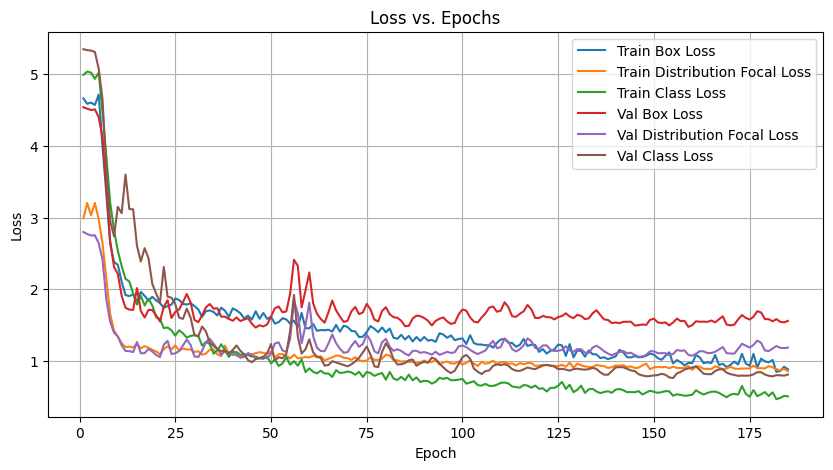

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取训练日志
log_path = '/kaggle/working/runs/detect/train/results.csv'
df = pd.read_csv(log_path)
print(df)
print(print(df.columns)
)
# 去除列名的多余空格
df.columns = df.columns.str.strip()
# 绘制训练和验证损失随训练轮次变化的图像
plt.figure(figsize=(10, 5))

plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train Distribution Focal Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val Distribution Focal Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()


In [20]:
# 验证模型
metrics = model.val(data=data_config)

# 使用测试集进行预测
results = model.predict(source='/kaggle/working/mydataset/images/test', save=True)


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/mydataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all          5         85      0.873      0.884       0.95      0.608
                    c1          2          7      0.996      0.857      0.953      0.526
                    d1          2          2      0.877          1      0.995      0.622
                    e1          3          5      0.978          1      0.995      0.649
                    f1          1          1      0.722          1      0.995      0.697
                    g1          2          7          1       0.84      0.995      0.599
                    a1          1          2       0.63          1      0.828      0.547
                    b1          1          1      0.744          1      0.995      0.697
                    c2          4         14      0.934      0.929      0.963       0.52
                    d2          3          6      0.758          1      0.972      0.676
                    e2          3         12      0.727          1      0.928      0.568
                    f

/kaggle/working/mydataset/images/test/16_11.jpg


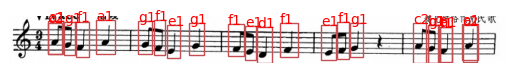

/kaggle/working/mydataset/images/test/16_12.jpg


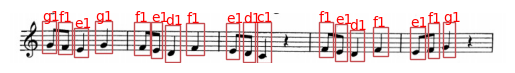

/kaggle/working/mydataset/images/test/17_8.jpg


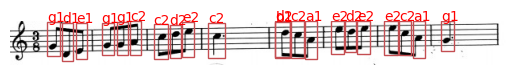

/kaggle/working/mydataset/images/test/18_2.jpg


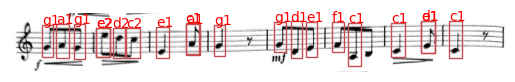

/kaggle/working/mydataset/images/test/18_7.jpg


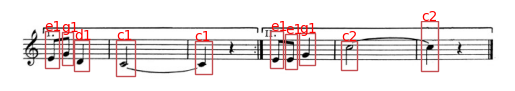

/kaggle/working/mydataset/images/test/18_8.jpg


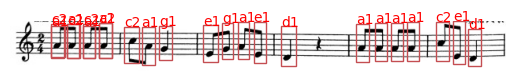

/kaggle/working/mydataset/images/test/19_10.jpg


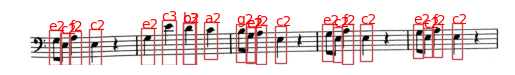

/kaggle/working/mydataset/images/test/19_2.jpg


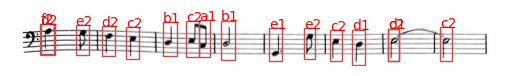

/kaggle/working/mydataset/images/test/19_3.jpg


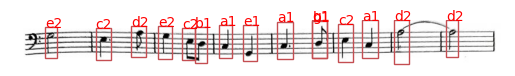

/kaggle/working/mydataset/images/test/19_4.jpg


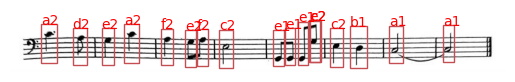

/kaggle/working/mydataset/images/test/32_6.png


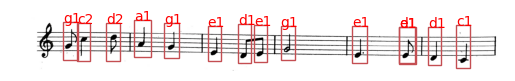

/kaggle/working/mydataset/images/test/llj3.jpg


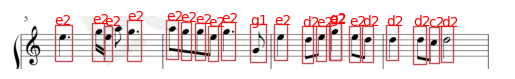

/kaggle/working/mydataset/images/test/music1.png


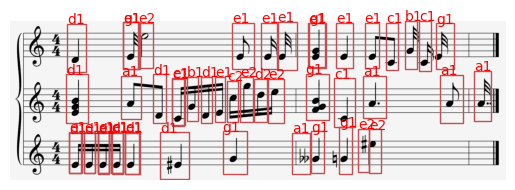

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


detection_info = []

for result in results:
    img_info = {
        "path": result.path,
        "boxes": [],
        "names": []
    }
    # 提取检测框和类别信息
    for box in result.boxes:

        box_info = {
            "coordinates_xy": box.xyxy.tolist(),
            "coordinates_wh": box.xywh.tolist(),
            "confidence": box.conf.tolist(),
            "class": result.names[int(box.cls.item())]
        }
        img_info["boxes"].append(box_info)
        img_info["names"].append(result.names[(box.cls.item())])

    detection_info.append(img_info)


for dete in detection_info:
  # 读取图像
  image = plt.imread(dete['path'])
  print(dete['path'])

  # 创建绘图对象
  fig, ax = plt.subplots()

  # 显示图像
  ax.imshow(image)

  # 为每个框绘制矩形
  for box in dete['boxes']:
      x, y, w, h = box['coordinates_xy'][0][0], box['coordinates_xy'][0][1], box['coordinates_wh'][0][2], box['coordinates_wh'][0][3]
      value = box['class']
      rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
      ax.add_patch(rect)
      plt.annotate(value, (x, y), color='red')

  # 关闭坐标轴
  plt.axis('off')

  # 显示绘图
  plt.show()